## C3P7

#### (Computer Exercise 3.1.3) Write a Python fuction polyinterp that takes as input a set of $(x, y)$ interpolation points and another $x_0$, and outputs $y_0$, the value of the interpolating polynomial at $x_0$. Your function may call newtdd and nest, and may be structured similar to Program 3.2, but without the graphics. Demonstrate your function works.

#### Additional instructions: The codes on page 146 should help. To demonstrate your function works, interpolate $\sin(x)$ on the interval $[-\pi, \pi]$, using nodes $\{ -\pi, \frac{\pi}{2}, 0, \frac{\pi}{2}, \pi \}$. Plot your interpolating polynomial. Use the numpy functions polyfit and polyval to plot an interpolating polynomial on the same graph. Label the graph so it is clear which curve is yours and which one came from Python/Numpy.

#### The first code cell imports needed libraries and initializes plt so the plots appear in the Jupyter notebook.


In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high resolution PNGs.
%config InlineBackend.figure_formats = {'png', 'retina'}

# Some Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

### This code cell contains my interpolating function.

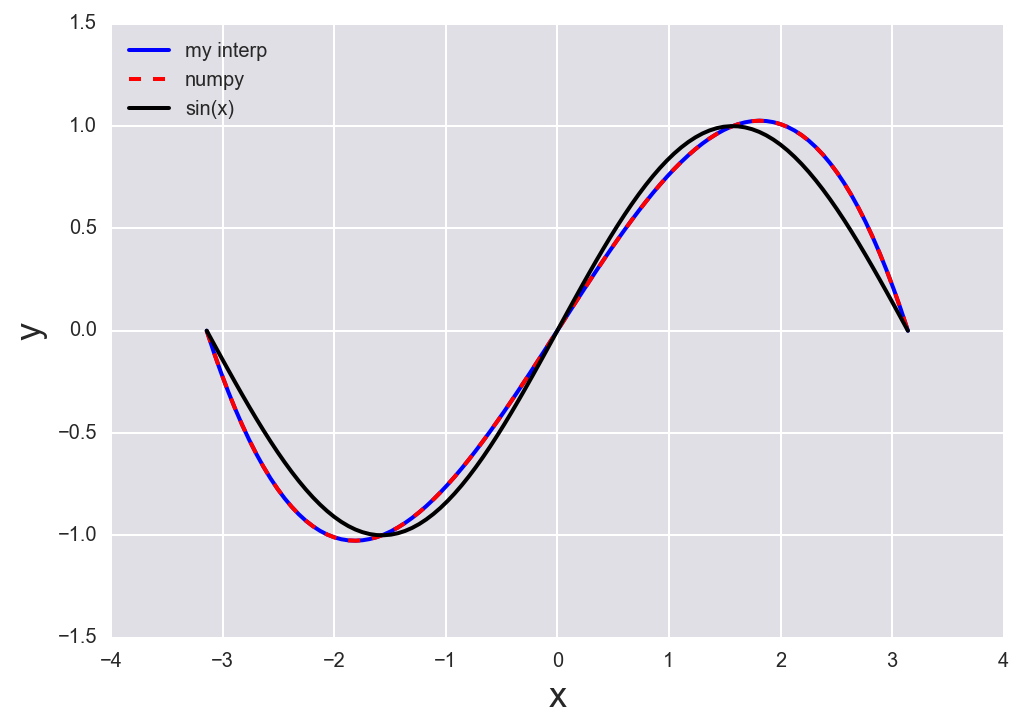

In [2]:
def polyinterp(x, y, x0):
# compute the coefficients
    c = newtdd(x, y)
# evaluate the polynomial
    y0 = nest(c, x0, x)
    return y0

def nest(c, x, b):
# evaluate polynomial using nested multiplication, see p. 3 of book
    d = len(c)-1
    y = c[d]
    for i in range(d-1,-1,-1):
        y *= (x-b[i])
        y += c[i]
    return y

def newtdd(x, y):
    n = len(x)
    v = np.zeros((n,n))
    for j in np.arange(n):
        v[j,0] = y[j]
    for i in np.arange(1,n):
# compute the Newton Divided Difference coefficients in column i
        for j in np.arange(n-i):
            v[j,i] = (v[j+1,i-1]-v[j,i-1])/(x[j+i]-x[j])
# Read along top of triangle for output coefficients
    c = v[0,:].copy()
    return c

# create the points to interpolate
x = np.linspace(-np.pi, np.pi, 5, endpoint=True)
y = np.sin(x)

# ceate list of plot points on x-axis
t = np.linspace(-np.pi, np.pi, 100, endpoint=True)
# evaluate the interpolating polynomial at each point
yt = polyinterp(x, y, t)

# use Numpy functions polyfit and polyval to interpolate the data
import numpy.polynomial.polynomial as poly
coefs = poly.polyfit(x, y, x.size-1)
yfit = poly.polyval(t, coefs)

# plot results
plt.plot(t, yt, 'b-', label='my interp')
plt.plot(t, yfit, 'r--', label='numpy')
plt.plot(t, np.sin(t), 'k-', label='sin(x)')
plt.legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### The blue curve and the red curve are visually identical.